In [0]:
!pip install gdal
!pip install rasterio
!pip install sentinelsat

In [0]:
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import gdal
from gdalconst import GA_ReadOnly 
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import numpy as np
from collections import Counter
from tqdm import tqdm_notebook as tqdm
IMG_SIZE=1031
import rasterio
from rasterio.plot import show
import subprocess
import os

Download CLC reference data

In [3]:
# !wget https://land.copernicus.eu/land-files/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
# !unzip /content/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
# !unzip /content/clc2018_clc2018_v2018_20_raster100m.zip

subprocess.run(['wget', 'https://land.copernicus.eu/land-files/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip'])
subprocess.run(['unzip' ,'7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip'])
subprocess.run(['unzip' ,'clc2018_clc2018_v2018_20_raster100m.zip'])

CompletedProcess(args=['unzip', 'clc2018_clc2018_v2018_20_raster100m.zip'], returncode=0)

In [0]:
api = SentinelAPI('uname', 'pwd',api_url='https://scihub.copernicus.eu/apihub')

In [5]:
api.download('e277e5c7-2bae-4fd6-a922-a6c68c60b1cf')

Downloading: 100%|██████████| 844M/844M [00:10<00:00, 78.6MB/s]
MD5 checksumming: 100%|██████████| 844M/844M [00:02<00:00, 419MB/s]


{'Creation Date': datetime.datetime(2019, 6, 13, 17, 58, 32, 770000),
 'Ingestion Date': datetime.datetime(2019, 6, 13, 17, 57, 54, 831000),
 'Online': True,
 'date': datetime.datetime(2019, 6, 13, 10, 10, 31, 24000),
 'downloaded_bytes': 844268679,
 'footprint': 'POLYGON((11.542631357244325 45.12552488296481,12.936097556086393 45.08595696049961,12.869986766421333 44.099770918209835,11.499848789004083 44.13800768802703,11.542631357244325 45.12552488296481))',
 'id': 'e277e5c7-2bae-4fd6-a922-a6c68c60b1cf',
 'md5': '36A8EB036B38AAAAE872F9AF6A49C2DD',
 'path': './S2A_MSIL1C_20190613T101031_N0207_R022_T32TQQ_20190613T121346.zip',
 'size': 844268679,
 'title': 'S2A_MSIL1C_20190613T101031_N0207_R022_T32TQQ_20190613T121346',
 'url': "https://scihub.copernicus.eu/apihub/odata/v1/Products('e277e5c7-2bae-4fd6-a922-a6c68c60b1cf')/$value"}

In [6]:
api.download('4f07815d-5709-4b0b-8fdd-7e12c78e6546')

Downloading: 100%|██████████| 854M/854M [00:12<00:00, 67.3MB/s]
MD5 checksumming: 100%|██████████| 854M/854M [00:02<00:00, 422MB/s]


{'Creation Date': datetime.datetime(2019, 6, 29, 21, 22, 36, 429000),
 'Ingestion Date': datetime.datetime(2019, 6, 29, 21, 22, 10, 608000),
 'Online': True,
 'date': datetime.datetime(2019, 6, 29, 10, 30, 31, 24000),
 'downloaded_bytes': 854147361,
 'footprint': 'POLYGON((7.614272368185703 49.64443007346099,9.135213595780941 49.652643868751746,9.132551327123652 48.66495515183609,7.64154622508021 48.6570207750582,7.614272368185703 49.64443007346099))',
 'id': '4f07815d-5709-4b0b-8fdd-7e12c78e6546',
 'md5': '7A7C5C6A0AB7142CF3216A961FD69B5B',
 'path': './S2A_MSIL1C_20190629T103031_N0207_R108_T32UMV_20190629T124358.zip',
 'size': 854147361,
 'title': 'S2A_MSIL1C_20190629T103031_N0207_R108_T32UMV_20190629T124358',
 'url': "https://scihub.copernicus.eu/apihub/odata/v1/Products('4f07815d-5709-4b0b-8fdd-7e12c78e6546')/$value"}

In [7]:
api.download('03cf3314-1b05-46f1-af1b-cee2652edf2b')

Downloading: 100%|██████████| 840M/840M [00:11<00:00, 71.3MB/s]
MD5 checksumming: 100%|██████████| 840M/840M [00:01<00:00, 427MB/s]


{'Creation Date': datetime.datetime(2019, 7, 24, 16, 12, 23, 125000),
 'Ingestion Date': datetime.datetime(2019, 7, 24, 16, 11, 21, 753000),
 'Online': True,
 'date': datetime.datetime(2019, 7, 24, 10, 30, 29, 24000),
 'downloaded_bytes': 839910682,
 'footprint': 'POLYGON((7.614272368185703 49.64443007346099,9.135213595780941 49.652643868751746,9.132551327123652 48.66495515183609,7.64154622508021 48.6570207750582,7.614272368185703 49.64443007346099))',
 'id': '03cf3314-1b05-46f1-af1b-cee2652edf2b',
 'md5': '0123963D0FE407650F36D8D872725AAF',
 'path': './S2B_MSIL1C_20190724T103029_N0208_R108_T32UMV_20190724T122822.zip',
 'size': 839910682,
 'title': 'S2B_MSIL1C_20190724T103029_N0208_R108_T32UMV_20190724T122822',
 'url': "https://scihub.copernicus.eu/apihub/odata/v1/Products('03cf3314-1b05-46f1-af1b-cee2652edf2b')/$value"}

In [8]:
#!unzip /content/S2A_MSIL1C_20160827T101022_N0204_R022_T32TPR_20160827T101025.zip
subprocess.run(['unzip', 'S2B_MSIL1C_20190724T103029_N0208_R108_T32UMV_20190724T122822.zip'])

CompletedProcess(args=['unzip', 'S2B_MSIL1C_20190724T103029_N0208_R108_T32UMV_20190724T122822.zip'], returncode=0)

In [9]:
#!unzip /content/S2A_MSIL1C_20190613T101031_N0207_R022_T32TQQ_20190613T121346.zip
subprocess.run(['unzip', 'S2A_MSIL1C_20190613T101031_N0207_R022_T32TQQ_20190613T121346.zip'])

CompletedProcess(args=['unzip', 'S2A_MSIL1C_20190613T101031_N0207_R022_T32TQQ_20190613T121346.zip'], returncode=0)

In [10]:
#!unzip /content/S2A_MSIL1C_20190629T103031_N0207_R108_T32UMV_20190629T124358.zip
subprocess.run(['unzip', 'S2A_MSIL1C_20190629T103031_N0207_R108_T32UMV_20190629T124358.zip'])

CompletedProcess(args=['unzip', 'S2A_MSIL1C_20190629T103031_N0207_R108_T32UMV_20190629T124358.zip'], returncode=0)

In [11]:
#!gdal_translate  '/content/S2A_MSIL1C_20160827T101022_N0204_R022_T32TPR_20160827T101025.SAFE/GRANULE/L1C_T32TPR_A006168_20160827T101025/IMG_DATA/T32TPR_20160827T101022_TCI.jp2' s1-full.tif
subprocess.run(['gdal_translate' ,'S2A_MSIL1C_20190613T101031_N0207_R022_T32TQQ_20190613T121346.SAFE/GRANULE/L1C_T32TQQ_A020754_20190613T101027/IMG_DATA/T32TQQ_20190613T101031_TCI.jp2' ,'s1-full.tif'])

CompletedProcess(args=['gdal_translate', 'S2A_MSIL1C_20190613T101031_N0207_R022_T32TQQ_20190613T121346.SAFE/GRANULE/L1C_T32TQQ_A020754_20190613T101027/IMG_DATA/T32TQQ_20190613T101031_TCI.jp2', 's1-full.tif'], returncode=0)

In [12]:
#!gdal_translate  '/content/S2A_MSIL1C_20190613T101031_N0207_R022_T32TQQ_20190613T121346.SAFE/GRANULE/L1C_T32TQQ_A020754_20190613T101027/IMG_DATA/T32TQQ_20190613T101031_TCI.jp2' s2-full.tif
subprocess.run(['gdal_translate' ,'S2A_MSIL1C_20190629T103031_N0207_R108_T32UMV_20190629T124358.SAFE/GRANULE/L1C_T32UMV_A020983_20190629T103537/IMG_DATA/T32UMV_20190629T103031_TCI.jp2' ,'s2-full.tif'])

CompletedProcess(args=['gdal_translate', 'S2A_MSIL1C_20190629T103031_N0207_R108_T32UMV_20190629T124358.SAFE/GRANULE/L1C_T32UMV_A020983_20190629T103537/IMG_DATA/T32UMV_20190629T103031_TCI.jp2', 's2-full.tif'], returncode=0)

In [13]:
#!gdal_translate  '/content/S2A_MSIL1C_20190629T103031_N0207_R108_T32UMV_20190629T124358.SAFE/GRANULE/L1C_T32UMV_A020983_20190629T103537/IMG_DATA/T32UMV_20190629T103031_TCI.jp2' s3-full.tif
subprocess.run(['gdal_translate' ,'S2B_MSIL1C_20190724T103029_N0208_R108_T32UMV_20190724T122822.SAFE/GRANULE/L1C_T32UMV_A012432_20190724T103030/IMG_DATA/T32UMV_20190724T103029_TCI.jp2' ,'s3-full.tif'])

CompletedProcess(args=['gdal_translate', 'S2B_MSIL1C_20190724T103029_N0208_R108_T32UMV_20190724T122822.SAFE/GRANULE/L1C_T32UMV_A012432_20190724T103030/IMG_DATA/T32UMV_20190724T103029_TCI.jp2', 's3-full.tif'], returncode=0)

In [14]:
#!gdalwarp -co "COMPRESS=DEFLATE" -t_srs EPSG:32632  /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif europe.tif

subprocess.run(['gdalwarp','-co','COMPRESS=DEFLATE','-t_srs','EPSG:32632','clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif','europe.tif'])


CompletedProcess(args=['gdalwarp', '-co', 'COMPRESS=DEFLATE', '-t_srs', 'EPSG:32632', 'clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif', 'europe.tif'], returncode=0)

In [15]:
data=gdal.Open('s1-full.tif',GA_ReadOnly) 
geoTransform=data.GetGeoTransform() 
minx=geoTransform[0] 
maxy=geoTransform[3] 
maxx = minx + geoTransform[1] * data.RasterXSize 
miny = maxy + geoTransform[5] * data.RasterYSize 
subprocess.call('gdal_translate -projwin ' + ' '.join([str(x) for x in [minx, maxy, maxx, miny]]) + ' -of GTiff europe.tif s1-y.tif', shell=True) 

0

In [0]:
#!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 10980 10980  's1-y-small.tif' 's1-y.tif'
#subprocess.call('gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 10980 10980  s1-y-small.tif s1-y.tif', shell=True)

In [0]:
!gdalinfo s3-y-small.tif

In [16]:
data=gdal.Open('s2-full.tif',GA_ReadOnly) 
geoTransform=data.GetGeoTransform() 
minx=geoTransform[0] 
maxy=geoTransform[3] 
maxx = minx + geoTransform[1] * data.RasterXSize 
miny = maxy + geoTransform[5] * data.RasterYSize 
subprocess.call('gdal_translate -projwin ' + ' '.join([str(x) for x in [minx, maxy, maxx, miny]]) + ' -of GTiff europe.tif s2-y.tif', shell=True) 

0

In [0]:
#!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 10980 10980  's2-y-small.tif' 's2-y.tif'
#subprocess.call('gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 10980 10980  s2-y-small.tif s2-y.tif', shell=True)

In [17]:
data=gdal.Open('s3-full.tif',GA_ReadOnly) 
geoTransform=data.GetGeoTransform() 
minx=geoTransform[0] 
maxy=geoTransform[3] 
maxx = minx + geoTransform[1] * data.RasterXSize 
miny = maxy + geoTransform[5] * data.RasterYSize 
subprocess.call('gdal_translate -projwin ' + ' '.join([str(x) for x in [minx, maxy, maxx, miny]]) + ' -of GTiff europe.tif s3-y.tif', shell=True) 

0

In [18]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 1031 1031 -r bilinear  's1-full.tif' 's1.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 1031 1031 -r bilinear  's2-full.tif' 's2.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 1031 1031 -r bilinear  's3-full.tif' 's3.tif'

Input file size is 10980, 10980
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 10980, 10980
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 10980, 10980
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.


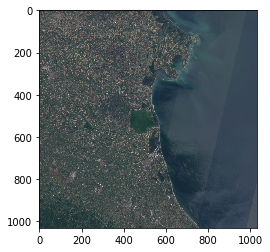

In [54]:
dataset = rasterio.open('s1.tif')
show(dataset.read([1,2,3]))

In [0]:
tif1=gdal.Open('s1.tif')
s1r = tif1.GetRasterBand(1).ReadAsArray()
s1g = tif1.GetRasterBand(2).ReadAsArray()
s1b = tif1.GetRasterBand(3).ReadAsArray()

tif1=gdal.Open('s2.tif')
s2r = tif1.GetRasterBand(1).ReadAsArray()
s2g = tif1.GetRasterBand(2).ReadAsArray()
s2b = tif1.GetRasterBand(3).ReadAsArray()

tif1=gdal.Open('s3.tif')
s3r = tif1.GetRasterBand(1).ReadAsArray()
s3g = tif1.GetRasterBand(2).ReadAsArray()
s3b = tif1.GetRasterBand(3).ReadAsArray()


In [56]:
tif2=gdal.Open('s1-y.tif')
Y_raster_s1 = tif2.GetRasterBand(1).ReadAsArray()

Y_raster_s1[Y_raster_s1 < 100] = 999
Y_raster_s1[(Y_raster_s1 > 100)&(Y_raster_s1 <= 150)] = 0
Y_raster_s1[(Y_raster_s1 > 150) & (Y_raster_s1 < 450)] = 125
Y_raster_s1[(Y_raster_s1 >= 450) & (Y_raster_s1 < 530)] = 255
Y_raster_s1[Y_raster_s1 > 530] = 125


Y_list=Y_raster_s1.flatten().tolist()
print(len(Y_list))

1062961


In [57]:
tif2=gdal.Open('s2-y.tif')
Y_raster_s2 = tif2.GetRasterBand(1).ReadAsArray()
print(np.unique(Y_raster_s2))
Y_raster_s2[Y_raster_s2 < 100] = 999
Y_raster_s2[(Y_raster_s2 > 100)&(Y_raster_s2 <= 150)] = 0
Y_raster_s2[(Y_raster_s2 > 150) & (Y_raster_s2 < 450)] = 125
Y_raster_s2[(Y_raster_s2 >= 450) & (Y_raster_s2 < 530)] = 255
Y_raster_s2[Y_raster_s2 > 530] = 125

Y_list=Y_list+(Y_raster_s2.flatten().tolist())

[111 112 121 122 123 124 131 132 133 141 142 211 221 222 231 242 243 311
 312 313 321 322 324 411 412 511 512]


In [58]:
tif2=gdal.Open('s3-y.tif')
Y_raster_s3= tif2.GetRasterBand(1).ReadAsArray()

Y_raster_s3[Y_raster_s3 < 100] = 999
Y_raster_s3[(Y_raster_s3 > 100)&(Y_raster_s3 <= 150)] = 0
Y_raster_s3[(Y_raster_s3 > 150) & (Y_raster_s3 < 450)] = 125
Y_raster_s3[(Y_raster_s3 >= 450) & (Y_raster_s3 < 530)] = 255
Y_raster_s3[Y_raster_s3 > 530] = 125

Y_list=Y_list+(Y_raster_s3.flatten().tolist())

print(len(Y_list))

3188883


In [59]:
print(np.unique(Y_list))

[  0 125 255]


In [0]:
#CONVERT RGB BANDS AS INPUT FEATURE SEQUENCES
#QUANTIZATION

rband_list=s1r.flatten().tolist()
rband_list=rband_list+(s2r.flatten().tolist())
rband_list=rband_list+(s3r.flatten().tolist())
#rband_list = [round(x/8) for x in rband_list]


gband_list=s1g.flatten().tolist()
gband_list=gband_list+(s2g.flatten().tolist())
gband_list=gband_list+(s3g.flatten().tolist())
#gband_list = [round(x/8) for x in gband_list]

bband_list=s1b.flatten().tolist()
bband_list=bband_list+(s2b.flatten().tolist())
bband_list=bband_list+(s3b.flatten().tolist())
#bband_list = [round(x/8) for x in bband_list]

In [61]:
print(len(rband_list))

3188883


***SEQUENCE LIST AND ANTECEDENT-CONSEQUENT LIST(X->Y)***

In [0]:
sequences_list=[]
ante_consq_list=[]

In [63]:
for i in tqdm(range(len(rband_list))):
  sequences_list.append((rband_list[i],gband_list[i],bband_list[i]))
  ante_consq_list.append((rband_list[i],gband_list[i],bband_list[i],Y_list[i]))

print('BUILDING DATA DONE')



BUILDING DATA DONE


***RANDOM EXAMPLE - DATA STRUCTURE (R, G, B, CLASS_LABEL)***

In [64]:
print ((ante_consq_list[22222]))

(56, 68, 72, 125)


***FIND UNIQUE SEQUENCES(X-cap) AND COUNT***

In [65]:
print('UNIQUE SEQUENCES COUNT: ')
print(len(list(set(sequences_list))))
unique_X_sequences=list(set(sequences_list))

UNIQUE SEQUENCES COUNT: 
87257




---



***STEP 2:***

*   ***ASSOCIATION ANALYSIS***
*   ***EVIDENCE BASED NORMALIZED DIFFERENTIAL INDEX(ENDI) MEASURE***




***HELPER FUNCTIONS:***

In [0]:
#ONE VARIATION OF ENDI INTERESTINGNESS MEASURE
def calculate_ENDI(positive,negative):
  if (positive==0) and (negative==0) : return 0
  return (positive-negative)/(positive+negative)

In [0]:
#POSITIVE EVIDENCES
def positive_count(sequence,class_name):
  item = list(sequence)
  item.append(class_name)
  c=counter[tuple(item)]
  return c


#NEGATIVE EVIDENCES
def negative_count(sequence, class_list):
  negative_classcount=0
  for c in  class_list:
    item = list(sequence)
    item.append(c)
    negative_classcount=negative_classcount+counter[tuple(item)]

  return negative_classcount



In [0]:
#COUNT FREQUENCIES OF EACH UNIQUE SEQUENCE
counter=Counter(ante_consq_list)

***CALCULATE ENDI MEASURE FOR ALL THE CLASSES PER SEQUENCE DATA***

In [69]:
#GENERATE A DICTIONARY OF THE FORM : {(unique sequence) : [ENDI MEASURE-CLASS 0, ENDI MEASURE-CLASS 1, ENDI MEASURE-CLASS 2 ]}
ENDI_table_dictionary={}

for i in tqdm(range(len(unique_X_sequences))):
  seq=unique_X_sequences[i]
  ENDI_class_0=calculate_ENDI(positive_count(seq,0),negative_count(seq,[125,255]))
  ENDI_class_1=calculate_ENDI(positive_count(seq,125),negative_count(seq,[0,255]))
  ENDI_class_2=calculate_ENDI(positive_count(seq,255),negative_count(seq,[0,125]))
  ENDI_table_dictionary[seq]=[ENDI_class_0,ENDI_class_1,ENDI_class_2]

print('BUILDING DICTIONARY DONE')

#PRINT RANDOM DATA POINT
#print(ENDI_table_dictionary[unique_X_sequences[5000]])



BUILDING DICTIONARY DONE




---



***STEP 3 : CLASSIFICATION AND VISUALIZATION***

In [0]:
def classification(file_name):
          new_image=gdal.Open(file_name)
          rband_new = new_image.GetRasterBand(1).ReadAsArray()
          gband_new = new_image.GetRasterBand(2).ReadAsArray()
          bband_new = new_image.GetRasterBand(3).ReadAsArray()

          rband_list_new=rband_new.flatten().tolist()
          gband_list_new=gband_new.flatten().tolist()
          bband_list_new=bband_new.flatten().tolist()

          #rband_list_new = [round(x/8) for x in rband_list_new]
          #gband_list_new = [round(x/8) for x in gband_list_new]
          #bband_list_new = [round(x/8) for x in bband_list_new]


          final_pred_list=[]

          for i in tqdm(range(len(rband_list_new))):

            if ((rband_list_new[i],gband_list_new[i],bband_list_new[i])) in ENDI_table_dictionary:
                  ENDI_vals=ENDI_table_dictionary[(rband_list_new[i],gband_list_new[i],bband_list_new[i])]
                  max_val = max(ENDI_vals)
                  index_max = ENDI_vals.index(max_val)
                  final_pred_list.append(index_max)   
            else:
              final_pred_list.append(1)
          return final_pred_list



In [0]:
def visualization(prediction_list):
  numpy_array=np.asarray(prediction_list)
  numpy_array[numpy_array == 1] = 125
  numpy_array[numpy_array == 2] = 255
  final_image_array=numpy_array.reshape((IMG_SIZE,IMG_SIZE))
  print(np.unique(final_image_array))
  plt.gray()
  plt.title('PORTO VIRO REGION - CLASSIFICATION RESULTS')
  plt.imshow(final_image_array)
  plt.savefig('classification-result.png')
  cv2.imwrite("classication-result.tif", final_image_array)



In [0]:
def metrics(y_actual, y_pred_original):
    numpy_array=np.asarray(y_pred_original)
    numpy_array[numpy_array == 1] = 125
    numpy_array[numpy_array == 2] = 255
    y_pred=numpy_array.tolist()
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in tqdm(range(len(y_pred))):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN



---



**VISUALIZATION OF RESULTS AND METRICS - PORTO VIRO AREA(ITALY)**

1) PORTO VIRO CLASSIFICATION RESULTS

In [73]:
prediction_list=classification('s1.tif')


[  0 125 255]


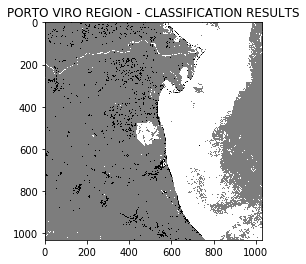

In [74]:
visualization(prediction_list)

In [75]:
m=metrics(Y_raster_s1.flatten().tolist(),prediction_list)

In [0]:
unique, counts = np.unique(Y_raster_s1.flatten().tolist(), return_counts=True)

In [77]:
for i in range(0,3):
  TP=m[1][i]
  FP=m[2][i]
  TN=m[3][i]
  FN=m[4][i]
  P=counts[i]
  N=len(Y_list)-P
  TPR=TP/P
  TNR=TN/N
  bal_measure = (TPR+TNR)/2
  inf_accuracy=TPR-TNR
  print('BALANCED ACCURACY FOR CLASS '+str(i)+" is "+ str(bal_measure))
  print('INFORMEDNESS FOR CLASS '+str(i)+" is "+str(inf_accuracy))




BALANCED ACCURACY FOR CLASS 0 is 0.3228134324995199
INFORMEDNESS FOR CLASS 0 is 0.03343144037008766
BALANCED ACCURACY FOR CLASS 1 is 0.541679866977207
INFORMEDNESS FOR CLASS 1 is 0.8369387957353143
BALANCED ACCURACY FOR CLASS 2 is 0.5695304717837667
INFORMEDNESS FOR CLASS 2 is 0.6615094155258958


2) PORTO VIRO RGB IMAGE

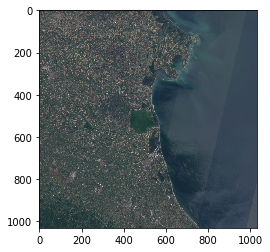

In [78]:
dataset = rasterio.open('s1.tif')
show(dataset.read([1,2,3]))



---

